# SUPINFO TP Machine Learning : Prédiction de la progression du diabète

Dataset : **Diabetes** (intégré à scikit-learn)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Chargement et exploration des données

In [2]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

print(df.head())
print("\nStatistiques descriptives :")
print(df.describe())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Statistiques descriptives :
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-

## Analyse exploratoire

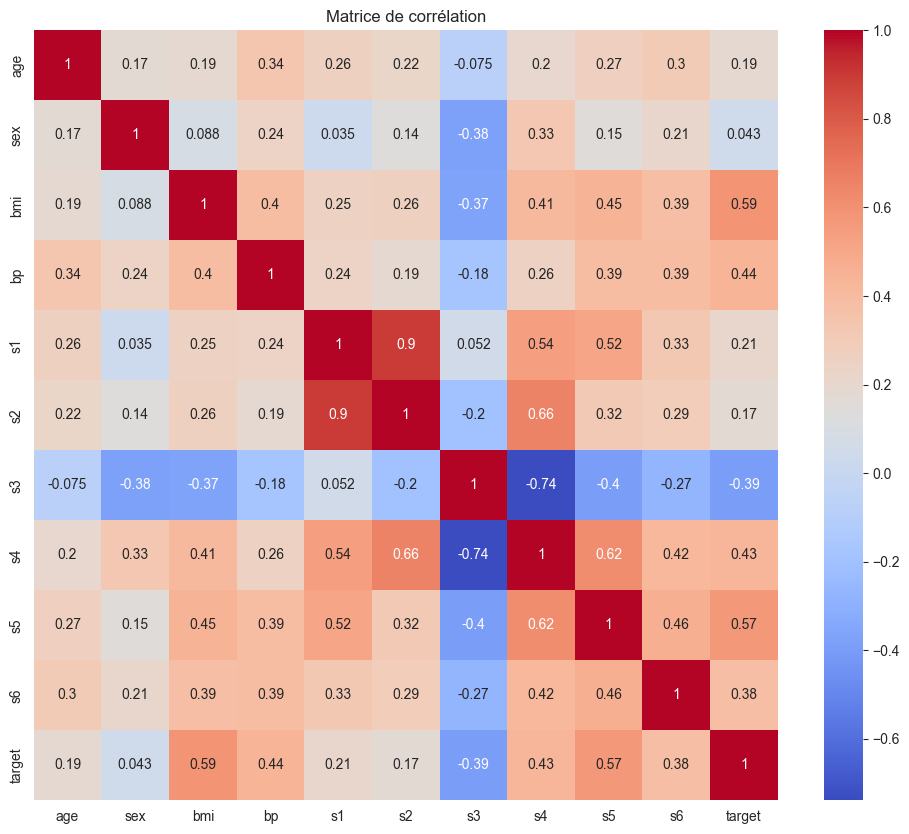

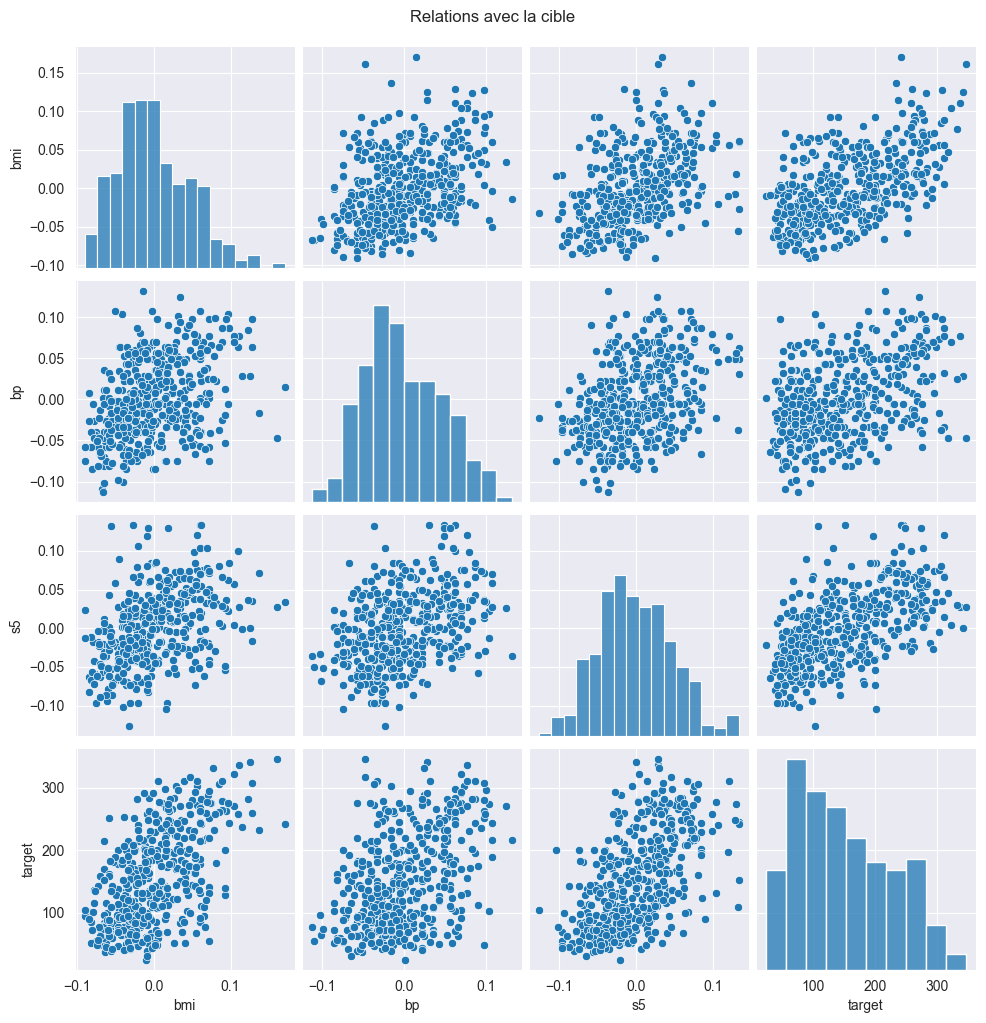

In [3]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

sns.pairplot(df[['bmi', 'bp', 's5', 'target']])
plt.suptitle("Relations avec la cible", y=1.02)
plt.show()

## Séparation des données

In [5]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modèle 1 : Régression Linéaire

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("R² :", r2_score(y_test, y_pred_lr))
print("MAE :", mean_absolute_error(y_test, y_pred_lr))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

R² : 0.4526027629719196
MAE : 42.79409467959993
RMSE : 53.85344583676592


## Modèle 2 : Ridge (régularisation L2)

In [7]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("R² :", r2_score(y_test, y_pred_ridge))
print("MAE :", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

R² : 0.4493973121295206
MAE : 44.416092331855225
RMSE : 54.01089328532644


## Modèle 3 : Lasso (régularisation L1)

In [8]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("R² :", r2_score(y_test, y_pred_lasso))
print("MAE :", mean_absolute_error(y_test, y_pred_lasso))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

R² : 0.4441176812523183
MAE : 44.915154525343965
RMSE : 54.26922589315691


## Pipeline avec StandardScaler + Régression

In [9]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred_pipe = pipeline.predict(X_test)

print("R² (pipeline) :", r2_score(y_test, y_pred_pipe))

R² (pipeline) : 0.45260276297191926


##  Comparaison des modèles

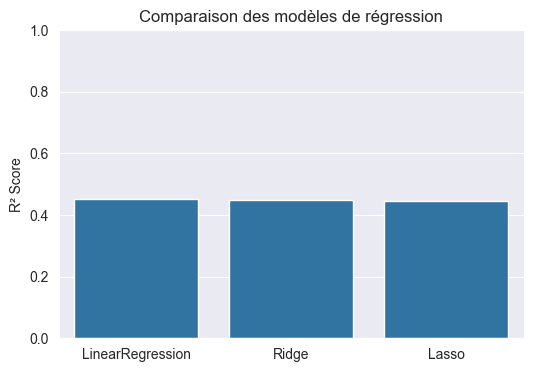

In [10]:
models = ['LinearRegression', 'Ridge', 'Lasso']
scores = [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_ridge), r2_score(y_test, y_pred_lasso)]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=scores)
plt.ylabel("R² Score")
plt.title("Comparaison des modèles de régression")
plt.ylim(0, 1)
plt.show()